In [105]:
import numpy as np
import matplotlib.pyplot as plt

## Total error 

Chcemy wybrać taki punkt $v \in \mathbb{R}^D$, żeby błąd zastąpienia wszystkich elementów $X$ przez $v$ był najmniejszy. Pokażemy, że wynik zależy od tego jak zdefiniujemy błąd.

Total error - sumaryczny błąd zdefiniowany jest jako:

$$
TE(X;v)  =  \|(x_i-v)_i\|_1=\sum_i \|x_i-v\|. 
$$

Ogólnie rzecz biorąc, w sytuacji wysokowymiarowej nie istnieją jawne wzory na minimalizację sumarycznego błędu. Pokażemy jak problem można rozwiązać w sytuacji skalarnej (jednowymiarowej). Jeśli $X \subset \mathbb{R}$ są danymi skalarnymi, to błąd dany jest przez 

$$
TE(X,v) = \sum_i |x_i-v|.
$$ 


Wylosujmy punkty z rozkładu normalnego.

In [173]:
data = np.array([-3.2,-3,-2,-2.2,-1.2,-0.5,0,3])#np.random.randn(10)

Zwizualizujmy nasze dane za pomocą histogramu.

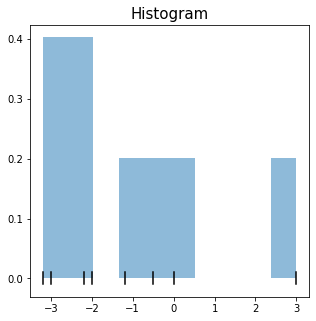

In [214]:
plt.figure(figsize=(5, 5))
plt.hist(data, density=True, alpha=0.5, label = "Hisotgram")
plt.plot([data,data], [0.01, -0.01], 'k')
plt.title("Histogram", fontsize=15)
# plt.legend(loc="lower right", fontsize=12)
plt.show()

In [175]:
def TE(v):
    return np.sum( np.abs(data-v) )

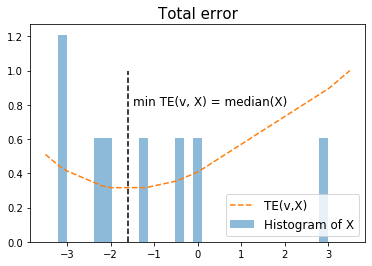

In [224]:
v = np.arange(-3.5, 3.5, 0.01)
plt.figure(figsize=(6, 4))
plt.hist(data, bins=30 ,density=True, label="Histogram of X", alpha = 0.5)
# plt.plot([data,data], [0.01, -0.01], 'k')
plt.plot(v, np.vectorize(TE)(v)/np.max(np.vectorize(TE)(v)), '--', ms=12, label='TE(v,X)')
plt.vlines(np.median(data), 0, 1, linestyles='--')
plt.text(np.median(data)+0.1, 0.8, "min TE(v, X) = median(X)", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.title("Total error", fontsize=15)
plt.show()

## Squarred-error - błąd kwadratowy

Chcemy wybrać taki punkt $v \in \mathbb{R}^D$, żeby błąd zastąpienia wszystkich elementów $X$ przez $v$ był najmniejszy. Pokażemy, że wynik zależy od tego jak zdefiniujemy błąd.

Squarred-error - błąd kwadratowy zdefiniowany jest jako:

$$
SE(X;v) = \|(x_i-v)_i\|_2^2=\sum_i \|x_i-v\|^2.
$$

Przejdźmy teraz do analizy błędu średniokwadratowego, który można łatwo zminimalizować analitycznie. Jeśli $X \subset \mathbb{R}$ są danymi skalarnymi, to błąd dany jest przez 

$$
SE(X,v) = \sum_i (x_i-v)^2.
$$ 

In [184]:
def SE(v):
    return np.sum( (data-v)**2 )

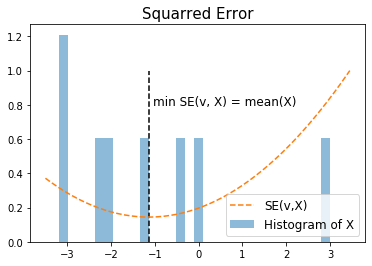

In [225]:
v = np.arange(-3.5, 3.5, 0.05)
plt.figure(figsize=(6, 4))
plt.hist(data, bins=30 ,density=True, label="Histogram of X", alpha = 0.5)
# plt.plot([data,data], [0.01, -0.01], 'k')
plt.plot(v, np.vectorize(SE)(v)/np.max(np.vectorize(SE)(v)), '--', ms=12, label='SE(v,X)')
plt.vlines(np.mean(data), 0, 1, linestyles='--')
plt.text(np.mean(data)+0.1, 0.8, "min SE(v, X) = mean(X)", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.title("Squarred Error", fontsize=15)
plt.show()

## Maximal Error - największy błąd

Chcemy wybrać taki punkt $v \in \mathbb{R}^D$, żeby błąd zastąpienia wszystkich elementów $X$ przez $v$ był najmniejszy. Pokażemy, że wynik zależy od tego jak zdefiniujemy błąd.

Błąd maksymalny zdefiniowany jest jako:

$$
ME(X;v) = \|(x_i-v)_i\|_{\infty}=\max_i \|x_i-v\| .
$$

Zauważmy, że powyższe wyrażenie, to promień najmniejszej kuli o środku w $v$ która zawiera dane.  Istnieją algorytmy znajdywania rozwiązania, ale w ogólności nie istnieją analityczne wzory, poza sytuacją jednowymiarową, gdzie optymalne rozwiązanie dane jest przez

$$
ME(X,v) = \max_i (x_i-v)^2.
$$ 

In [179]:
def ME(v):
    return np.max( (data-v)**2 )

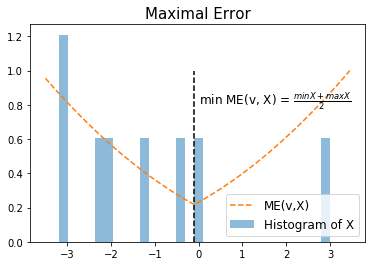

In [221]:
v = np.arange(-3.5, 3.5, 0.05)
plt.figure(figsize=(6, 4))
plt.hist(data, bins=30 ,density=True, label="Histogram of X", alpha = 0.5)
# plt.plot([data,data], [0.01, -0.01], 'k')
plt.plot(v, np.vectorize(ME)(v)/np.max(np.vectorize(ME)(v)), '--', ms=12, label='ME(v,X)')
plt.vlines(0.5*(np.min(data)+np.max(data)), 0, 1, linestyles='--')
plt.text(0.5*(np.min(data)+np.max(data))+0.1, 0.8, r"min ME(v, X) = $\frac{min X + max X}{2}$", fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.title("Maximal Error", fontsize=15)
plt.show()

# All

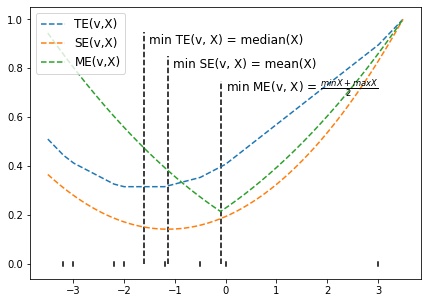

In [210]:
v = np.arange(-3.5, 3.5, 0.01)
plt.figure(figsize=(7, 5))
# plt.hist(data, bins=30 ,density=True, alpha = 0.5)
plt.plot([data,data], [0.01, -0.01], 'k')
plt.plot(v, np.vectorize(TE)(v)/np.max(np.vectorize(TE)(v)), '--', ms=12, label='TE(v,X)')
plt.vlines(np.median(data), 0, 0.95, linestyles='--')
plt.text(np.median(data)+0.1, 0.9, "min TE(v, X) = median(X)", fontsize=12)

plt.plot(v, np.vectorize(SE)(v)/np.max(np.vectorize(SE)(v)), '--', ms=12, label='SE(v,X)')
plt.vlines(np.mean(data), 0, 0.85, linestyles='--')
plt.text(np.mean(data)+0.1, 0.8, "min SE(v, X) = mean(X)", fontsize=12)

plt.plot(v, np.vectorize(ME)(v)/np.max(np.vectorize(ME)(v)), '--', ms=12, label='ME(v,X)')
plt.vlines(0.5*(np.min(data)+np.max(data)), 0, 0.75, linestyles='--')
plt.text(0.5*(np.min(data)+np.max(data))+0.1, 0.7, r"min ME(v, X) = $\frac{min X + max X}{2}$", fontsize=12)

plt.legend(loc="upper left", fontsize=12)
plt.show()